### Importing Libraries

In [15]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline


from math import sqrt
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from statsmodels.stats.outliers_influence import variance_inflation_factor 

### Read the dataset once

In [2]:
# // read csv file
df = pd.read_csv('df.csv', index_col=0)

C:\Users\ashit\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df.head(3)

,id,price,transfer_date,postcode,type,new,duration,paon,saon,street,locality,city,district,county,ppd_cat,record_status,year,month,lin_month
0,{68FEB20C-5A56-38DA-E053-6C04A8C051AE},212000,2018-02-26,L30 5RW,S,0,F,36,NaN,BROWNS LANE,NaN,BOOTLE,SEFTON,MERSEYSIDE,B,A,2018,2,2
1,{68FEB20C-5A57-38DA-E053-6C04A8C051AE},56000,2018-02-09,L6 6BG,T,0,F,75,NaN,GILROY ROAD,NaN,LIVERPOOL,LIVERPOOL,MERSEYSIDE,B,A,2018,2,2
2,{68FEB20C-5A58-38DA-E053-6C04A8C051AE},38750,2018-03-21,CH41 4HJ,T,0,F,5,NaN,TRINITY STREET,NaN,BIRKENHEAD,WIRRAL,MERSEYSIDE,B,A,2018,3,3


### Encoded all the categorical variables

In [4]:
# Encoded all the categorical variables
def encode_type(df):
    le = preprocessing.LabelEncoder()
    df['id'] = le.fit_transform(df['id'])
    df['type'] = le.fit_transform(df['type'])
    df['postcode'] = le.fit_transform(df['postcode'])
    df['type'] = le.fit_transform(df['type'])
    df['county'] = le.fit_transform(df['county'])
    df['district'] = le.fit_transform(df['district'])
    df['duration'] = le.fit_transform(df['duration'])
    df['street'] = le.fit_transform(df['street'])
    df['locality'] = le.fit_transform(df['locality'])
    df['city'] = le.fit_transform(df['city'])
    df['ppd_cat'] = le.fit_transform(df['ppd_cat'])
    df['record_status'] = le.fit_transform(df['record_status'])
    df['year'] = le.fit_transform(df['year'])
    return df

In [5]:
df = encode_type(df)
df.head(1)

,id,price,transfer_date,postcode,type,new,duration,paon,saon,street,locality,city,district,county,ppd_cat,record_status,year,month,lin_month
0,63807,212000,2018-02-26,224539,3,0,0,36,NaN,23396,16798,130,251,57,1,0,0,2,2


### Drop the unecessery categorical variables as of now 

In [6]:
# drop the unecessery categorical variables
def drop_columns(df):
    df.drop(['id','transfer_date','paon','saon'], axis=1, inplace=True)
    return df

In [7]:
#final data set for model training as per instruction keeping the at most features.
df2 = drop_columns(df)

### There is no null value in the final data set

In [8]:
# there is no null value in the data set
df2.isnull().sum()

price            0
postcode         0
type             0
new              0
duration         0
street           0
locality         0
city             0
district         0
county           0
ppd_cat          0
record_status    0
year             0
month            0
lin_month        0
dtype: int64

### Log transformation of the target variable

In [9]:
import numpy as np
num_features=['price']

for feature in num_features:
    df2[feature]=np.log(df2[feature])

In [10]:
df2

,price,postcode,type,new,duration,street,locality,city,district,county,ppd_cat,record_status,year,month,lin_month
0,12.264342,224539,3,0,0,23396,16798,130,251,57,1,0,0,2,2
1,10.933107,227224,4,0,0,65264,16798,577,174,57,1,0,0,2,2
2,10.564886,84382,4,0,0,165107,16798,111,344,57,1,0,0,3,3
3,10.968198,227608,4,0,0,47826,16798,577,174,57,1,0,0,3,3
4,11.492723,86526,4,0,0,89811,16798,1115,344,57,1,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018445,11.898154,222987,3,1,0,53247,16798,130,251,57,0,0,1,1,13
1018446,12.611521,227528,1,1,1,127660,16798,577,174,57,0,0,1,2,14
1018447,12.691565,227528,1,1,1,127660,16798,577,174,57,0,0,1,2,14
1018448,12.100684,227527,1,1,1,127660,16798,577,174,57,0,0,1,2,14


### Feature scaling for all the features expect target variable 

In [11]:
# feature scaling
feature_scale=[feature for feature in df2.columns if feature not in ['price']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df2[feature_scale]) 

MinMaxScaler()

In [12]:
scaler.transform(df2[feature_scale])

array([[0.41438869, 0.75      , 0.        , ..., 0.        , 0.09090909,
        0.04347826],
       [0.41934388, 1.        , 0.        , ..., 0.        , 0.09090909,
        0.04347826],
       [0.15572772, 1.        , 0.        , ..., 0.        , 0.18181818,
        0.08695652],
       ...,
       [0.41990492, 0.25      , 1.        , ..., 1.        , 0.09090909,
        0.56521739],
       [0.41990307, 0.25      , 1.        , ..., 1.        , 0.09090909,
        0.56521739],
       [0.15889277, 0.25      , 1.        , ..., 1.        , 0.18181818,
        0.60869565]])

In [13]:
# transform the train and test set, and add on the Id and Price variables
data = pd.concat([df2[['price']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df2[feature_scale]), columns=feature_scale)],
                    axis=1)

### we can see as such highly correlated variables like city , district, country

<AxesSubplot:>

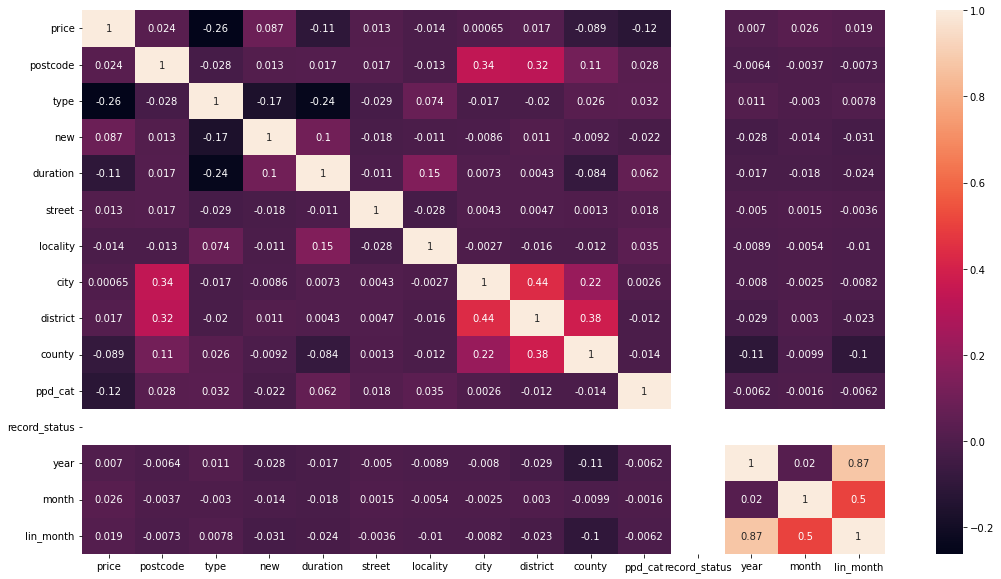

In [16]:
# we can see as such highley correlated variables
corrmat = data.corr()
fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(corrmat, annot=True, annot_kws={"size":10})

Vif functions for uses of further for Multicollinearity

In [ ]:
# vif for train set

def vif_(X, features):
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = features
    return vif

### Divide variables to dependent and independent

In [ ]:
x=data.drop('price', axis = 1)
# y=np.log(df2['price'])
y=(data['price'])
print("shape of x=",x.shape)
print("shape of y=",y.shape)

shape of x= (1018450, 14)
shape of y= (1018450,)


### OLS 

In [ ]:
# ols methods
x= sm.add_constant(x)
ols = sm.OLS(y,x).fit()
ols.summary()

C:\Users\ashit\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                 1.150e+04
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:55:21   Log-Likelihood:            -1.1796e+06
No. Observations:             1018450   AIC:                         2.359e+06
Df Residuals:                 1018436   BIC:                         2.359e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.7591      0.004   3212.781      0.000      12.751      12.767
postcode          0.0570      0.003     19.834      0.000       0.051       0.063
type             -0.6323      0.002   -304.075      0.000      -0.636      -0.628
new               0.1358      0.002     58.206      0.000       0.131       0.140
duration         -0.3780      0.002   -199.123      0.000      -0.382      -0.374
street            0.0164      0.003      6.304      0.000       0.011       0.021
locality          0.1100      0.003     43.146      0.000       0.105       0.115
city             -0.0183      0.003     -5.781      0.000      -0.024      -0.012
district          0.1471      0.003     47.042      0.000       0.141       0.153
county           -0.3652      0.003   -117.424      0.000      -0.371      -0.359
ppd_cat          -0.2279      0.002   -111.569      0.000      -0.232      -0.224
record_status    69.7418    367.271      0.190      0.849    -650.097     789.580
year           3.092e+08   1.63e+09      0.190      0.849   -2.88e+09     3.5e+09
month          2.834e+08   1.49e+09      0.190      0.849   -2.64e+09    3.21e+09
lin_month     -5.926e+08   3.12e+09     -0.190      0.849   -6.71e+09    5.52e+09
==============================================================================
Omnibus:                   214929.374   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4653441.204
Skew:                          -0.471   Prob(JB):                         0.00
Kurtosis:                      13.429   Cond. No.                     1.19e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.09e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

coef, std error and P-value prety hight for few features like record_status, year, month etc, that indicates that those feature has highly multicollinearity and p-Value is relatively low and R2 is not good at all.

### Split the data into train and test

In [ ]:
# // split the data into train and test

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.20, random_state = 35)

### Apply Feature Selection with Lasso Regression model

In [ ]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
feature_sel_model.get_support()

array([False,  True,  True,  True,  True, False,  True, False,  True,
        True,  True, False, False,  True, False])

In [ ]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = x_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
# print('features with coefficients shrank to zero: {}'.format(
#     np.sum(sel_.estimator_.coef_ == 0)))

total features: 15
selected features: 9


In [ ]:
selected_feat   

Index(['postcode', 'type', 'new', 'duration', 'locality', 'district', 'county',
       'ppd_cat', 'month'],
      dtype='object')

In [ ]:
X_train = x_train[selected_feat]
X_train

,postcode,type,new,duration,locality,district,county,ppd_cat,month
61925,0.077039,1.00,1.0,0.0,1.000000,0.067416,0.350877,0.0,0.000000
443439,0.289714,0.25,0.0,1.0,1.000000,0.879213,0.342105,0.0,0.636364
976501,0.214129,0.75,0.0,0.0,0.211573,0.230337,0.912281,0.0,0.909091
94660,0.885187,0.25,1.0,1.0,0.260448,0.710674,0.438596,0.0,1.000000
1015673,0.081158,1.00,0.0,1.0,1.000000,0.120787,0.350877,0.0,0.272727
...,...,...,...,...,...,...,...,...,...
56300,0.120087,1.00,0.0,0.0,1.000000,0.188202,0.166667,0.0,0.454545
179233,0.340825,0.75,0.0,0.0,0.318371,0.280899,0.377193,0.0,0.909091
41911,0.808530,0.00,0.0,0.0,0.416002,0.831461,0.833333,0.0,0.363636
378127,0.567815,0.00,0.0,0.0,0.930647,0.747191,0.473684,0.0,0.090909


### Feature selection for test set

In [ ]:
# // feature selection for test set
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x_test, y_test)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
# this is how we can make a list of the selected features
selected_feat_y = x_test.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((x_test.shape[1])))
print('selected features: {}'.format(len(selected_feat_y)))

total features: 15
selected features: 9


In [ ]:
X_test = x_test[selected_feat_y]
X_test

,postcode,type,new,duration,locality,district,county,ppd_cat,month
433690,0.204726,1.00,0.0,0.0,0.993333,0.230337,0.912281,0.0,0.363636
196012,0.104838,0.75,0.0,0.0,1.000000,0.188202,0.166667,0.0,0.181818
778613,0.887680,0.50,0.0,0.0,1.000000,0.918539,0.307018,1.0,1.000000
424797,0.041029,0.75,0.0,0.0,1.000000,0.764045,0.736842,0.0,0.000000
446584,0.620333,1.00,1.0,0.0,1.000000,0.662921,0.350877,0.0,0.181818
...,...,...,...,...,...,...,...,...,...
909346,0.883655,0.75,0.0,0.0,1.000000,0.867978,0.438596,0.0,0.727273
240461,0.353435,0.00,0.0,0.0,0.342422,0.460674,0.938596,0.0,0.818182
602825,0.291769,0.25,1.0,1.0,1.000000,0.370787,0.342105,0.0,0.727273
166607,0.286225,0.25,1.0,1.0,1.000000,0.879213,0.342105,0.0,1.000000


### Also we can check the VIF score for microcolonarity after feature selection 

In [ ]:
vif_(X_train, X_train.columns)

,VIF Factor,features
0,4.099611,postcode
1,2.963983,type
2,1.163535,new
3,1.436656,duration
4,5.846758,locality
5,4.740413,district
6,4.978945,county
7,1.210267,ppd_cat
8,3.554733,month


### create a function to create adjusted R-Squared

In [ ]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = Linear_Regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

After doing all the feature scaling, feature selection and VIF, still we have a one feature with highly correlated with the target variable. So we need to remove that one feature.

### Fit the Linear Regression model

In [ ]:
# // fit the model
Linear_Regression = LinearRegression()
Linear_Regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = Linear_Regression.predict(X_test)
y_pred

array([11.96776072, 12.37745764, 12.44782024, ..., 12.4533934 ,
       12.53865485, 12.08425945])

In [ ]:
## R2 score for training
R2 = Linear_Regression.score(X_train,y_train)
print("R2 score for training: ", R2)

# // adj R2 score for training
adj_R2 = adj_r2(X_train,y_train)
print("Adjusted R2 score for training: ", adj_R2)

R2 score for training:  0.12757647666496896
Adjusted R2 score for training:  0.1275668395840115


our r2 score is 12.75% and adj r2 is 12.75% for our training set, so looks like we dont have a good model


In [ ]:
r2_reg = metrics.r2_score(y_test, y_pred)
adj_r2_reg = adj_r2(X_test,y_test)
mse_reg = metrics.mean_squared_error(y_test, y_pred)
rmse_reg = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mae_reg = metrics.mean_absolute_error(y_test, y_pred)

print("R2 For Test :", r2_reg)
print("adj R2 For Test :",adj_r2_reg)
print("MSE For Test :", mse_reg)
print("RMSE For Test :",rmse_reg)
print("MAE For Test :",mae_reg)

R2 For Test : 0.12924389899419153
adj R2 For Test : 0.1292054229292413
MSE For Test : 0.5892688473048839
RMSE For Test : 0.7676384873785863
MAE For Test : 0.5271200088318954


So it looks like our model r2 score is more on the test data along with RMSE, MSE, MAE

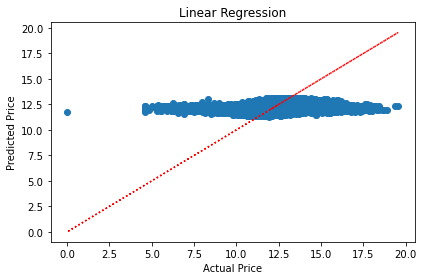

In [ ]:
plt.figure(2)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, ':r')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression')
plt.tight_layout()
plt.savefig('lr.tif')

Plotted after changing the alpha with Ridge Regularization for experimental purpose.

### Decision Tree Regression

In [ ]:
#  Creating the Decision Tree regressor
dt_reg = DecisionTreeRegressor(random_state = 42)
dt_reg  = dt_reg.fit(X_train, y_train)

In [ ]:
y_pred_dt= dt_reg.predict(X_test)
y_pred_dt

array([12.1375261 , 12.32363343, 12.87390202, ..., 13.46873582,
       13.35009795, 12.52088339])

In [ ]:
## R2 score for training
R2_DT = dt_reg.score(X_train,y_train)
print("R2 score for training: ", R2_DT)

# // adj R2 score for training
adj_R2_dt = adj_r2(X_train,y_train)
print("Adjusted R2 score for training: ", adj_R2_dt)

R2 score for training:  0.9918786797395122
Adjusted R2 score for training:  0.1275668395840115


In [ ]:
r2_dt = metrics.r2_score(y_test, y_pred_dt)
mse_dt = metrics.mean_squared_error(y_test, y_pred_dt)
rmse_dt = (np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))
mae_dt = metrics.mean_absolute_error(y_test, y_pred_dt)

print("RMSE For Test :",rmse_dt)
print("MSE For Test :", mse_dt)
print("R2 For Test :",r2_dt)
print("MAE For Test :",metrics.mean_absolute_error(y_test, y_pred_dt))

RMSE For Test : 0.7024159156256616
MSE For Test : 0.4933881185242366
R2 For Test : 0.2709257984132445
MAE For Test : 0.3487325613346924


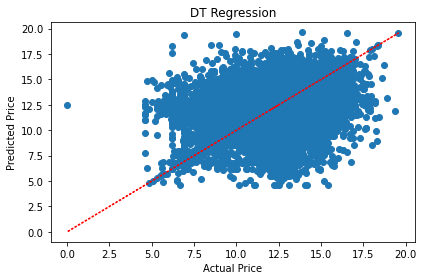

In [ ]:
plt.figure(2)
plt.scatter(y_test, y_pred_dt)
plt.plot(y_test, y_test, ':r')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('DT Regression')
plt.tight_layout()
plt.savefig('lr.tif')

### Random Forest Regression

In [ ]:
# Creating the Random Forest regressor
rf_reg = RandomForestRegressor()
rf_reg = rf_reg.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred_rf= dt_reg.predict(X_test)
y_pred_rf

array([12.1375261 , 12.32363343, 12.87390202, ..., 13.46873582,
       13.35009795, 12.52088339])

In [ ]:
## R2 score for training
R2_rf = dt_reg.score(X_train,y_train)
print("R2 score for training: ", R2_rf)

# // adj R2 score for training
adj_R2_rf = adj_r2(X_train,y_train)
print("Adjusted R2 score for training: ", adj_R2_rf)

R2 score for training:  0.9918786797395122
Adjusted R2 score for training:  0.1275668395840115


In [ ]:
r2_rm = metrics.r2_score(y_test, y_pred_rf)
mse_rm = metrics.mean_squared_error(y_test, y_pred_rf)
rmse_rm = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
mae_rm = metrics.mean_absolute_error(y_test, y_pred_rf)

print("R2 For Test :",r2_rm)
print("MSE For Test :", mse_rm)
print("RMSE For Test :",rmse_rm)
print("MAE For Test :", mae_rm)

R2 For Test : 0.2709257984132445
MSE For Test : 0.4933881185242366
RMSE For Test : 0.7024159156256616
MAE For Test : 0.3487325613346924


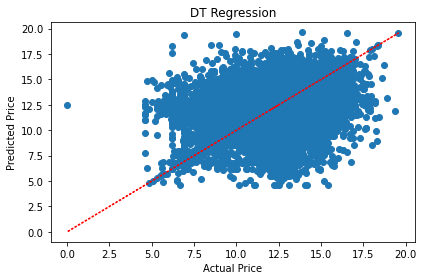

In [ ]:
plt.figure(2)
plt.scatter(y_test, y_pred_rf)
plt.plot(y_test, y_test, ':r')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('DT Regression')
plt.tight_layout()
plt.savefig('lr.tif')

In [ ]:
models = [('Linear Regression', mse_reg,mae_reg, rmse_reg, R2, r2_reg),
          ('Decision Tree Regression',mse_dt, mae_dt, rmse_dt, R2_DT, r2_dt),
          ('Random Forest Regression',mse_rm,mae_rm, rmse_rm, R2_rf, r2_rm)   
         ]

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model','MSE', 'MAE','RMSE', 'R2_Score(training)', 'R2_Score(test)'])
predict

,Model,MSE,MAE,RMSE,R2_Score(training),R2_Score(test)
0,Linear Regression,0.589269,0.527120,0.767638,0.127576,0.129244
1,Decision Tree Regression,0.493388,0.348733,0.702416,0.991879,0.270926
2,Random Forest Regression,0.493388,0.348733,0.702416,0.991879,0.270926
